In [ ]:
import pandas as pd
df = pd.read_csv("drug200.csv")

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.isna().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
195,False
196,False
197,False
198,False


In [ ]:
df.duplicated().sum()

0

In [ ]:
df[df.duplicated()]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Sex
M    104
F     96
Name: count, dtype: int64


<ipython-input-17-413e2c6b7e80>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.countplot(data = df , x = 'Sex' , palette='Set2')


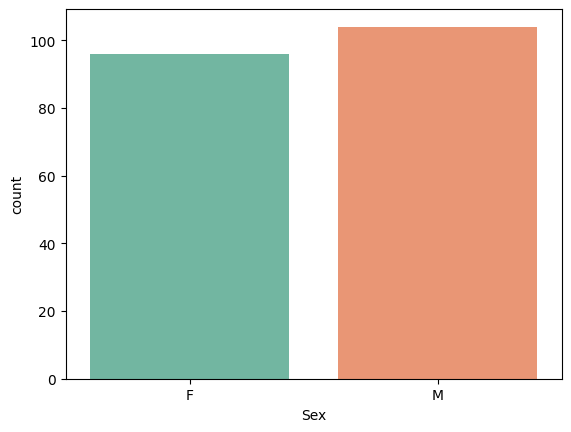

In [ ]:
x = df.Sex.value_counts()
print(x)
p = sns.countplot(data = df , x = 'Sex' , palette='Set2')

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


<ipython-input-18-5f6ddd87edd8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.countplot(data = df , x = 'Drug' , palette='Set2')


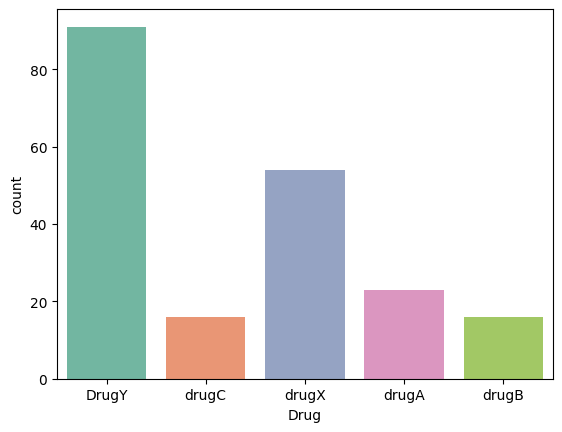

In [ ]:
x = df.Drug.value_counts()
print(x)
p = sns.countplot(data = df , x = 'Drug' , palette='Set2')

In [ ]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

<ipython-input-23-6eb47ae1b480>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Drug']== 'drugA']['Age'] , color ='red')
<ipython-input-23-6eb47ae1b480>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Drug']== 'drugB']['Age'] , color ='green' )
<ipython-input-23-6eb47ae1b480>:4: 

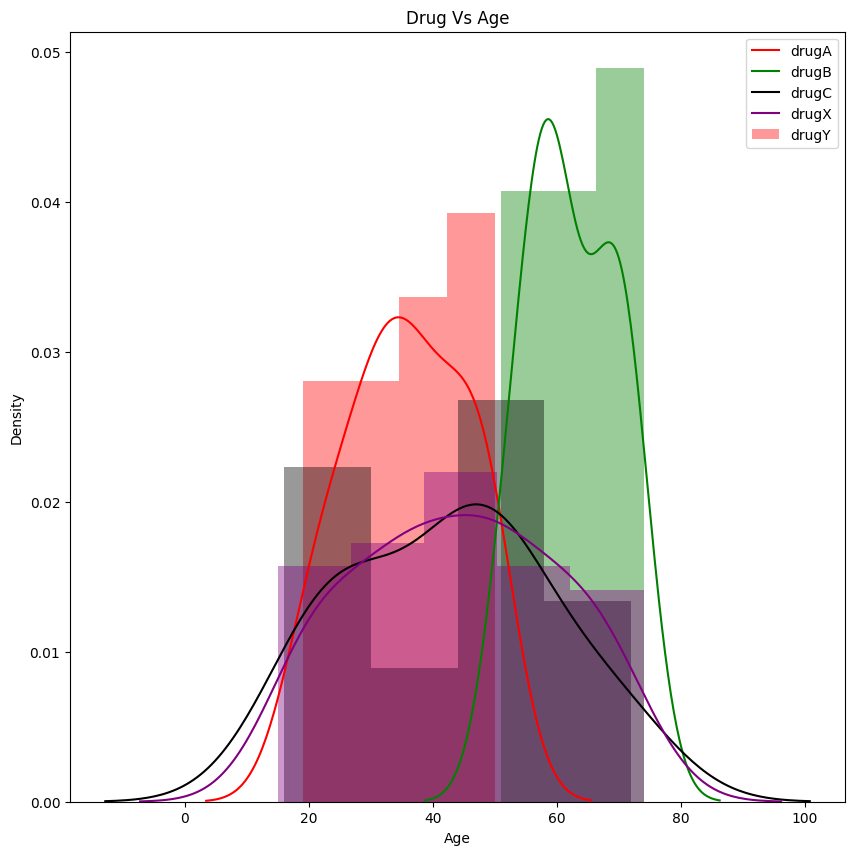

In [ ]:
plt.figure(figsize = (10,10))
sns.distplot(df[df['Drug']== 'drugA']['Age'] , color ='red')
sns.distplot(df[df['Drug']== 'drugB']['Age'] , color ='green' )
sns.distplot(df[df['Drug']== 'drugC']['Age'] , color ='black')
sns.distplot(df[df['Drug']== 'drugX']['Age'] , color ='purple')
sns.distplot(df[df['Drug']== 'drugY']['Age'] , color ='orange')
plt.title("Drug Vs Age")
plt.legend(['drugA','drugB','drugC','drugX','drugY'])

In [ ]:

from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df['BP']  = oe.fit_transform(df[['BP']])
df['Sex'] = oe.fit_transform(df[['Sex']])
df['Cholesterol'] = oe.fit_transform(df[['Cholesterol']])
df['Drug'] = oe.fit_transform(df[['Drug']])

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0.0,0.0,0.0,25.355,0.0
1,47,1.0,1.0,0.0,13.093,3.0
2,47,1.0,1.0,0.0,10.114,3.0
3,28,0.0,2.0,0.0,7.798,4.0
4,61,0.0,1.0,0.0,18.043,0.0
...,...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567,3.0
196,16,1.0,1.0,0.0,12.006,3.0
197,52,1.0,2.0,0.0,9.894,4.0
198,23,1.0,2.0,1.0,14.020,4.0


In [ ]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [ ]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0.0,0.0,0.0,25.355
1,47,1.0,1.0,0.0,13.093
2,47,1.0,1.0,0.0,10.114
3,28,0.0,2.0,0.0,7.798
4,61,0.0,1.0,0.0,18.043
...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567
196,16,1.0,1.0,0.0,12.006
197,52,1.0,2.0,0.0,9.894
198,23,1.0,2.0,1.0,14.020


In [ ]:
y

,Drug
0,0.0
1,3.0
2,3.0
3,4.0
4,0.0
...,...
195,3.0
196,3.0
197,4.0
198,4.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [ ]:
X_train.shape

(160, 5)

In [ ]:
X_train

,Age,Sex,BP,Cholesterol,Na_to_K
134,42,0.0,0.0,0.0,21.036
66,29,1.0,0.0,0.0,12.856
26,31,1.0,0.0,0.0,30.366
113,65,0.0,1.0,1.0,13.769
168,51,0.0,1.0,1.0,23.003
...,...,...,...,...,...
67,17,1.0,2.0,1.0,10.832
192,72,1.0,1.0,0.0,16.310
117,40,0.0,2.0,0.0,10.103
47,68,1.0,1.0,0.0,10.291


In [ ]:
y_train

,Drug
134,0.0
66,1.0
26,0.0
113,4.0
168,0.0
...,...
67,4.0
192,0.0
117,4.0
47,3.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_gini= DecisionTreeClassifier(criterion = 'gini' , random_state = 0)
clf_gini.fit(X_train,y_train)
y_pred = clf_gini.predict(X_test)

In [ ]:
y_pred

array([3., 4., 0., 0., 0., 4., 4., 4., 0., 4., 1., 0., 0., 0., 2., 3., 0.,
       0., 4., 0., 0., 4., 4., 4., 0., 0., 0., 0., 0., 4., 4., 3., 1., 4.,
       0., 0., 4., 0., 1., 4.])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

1.0


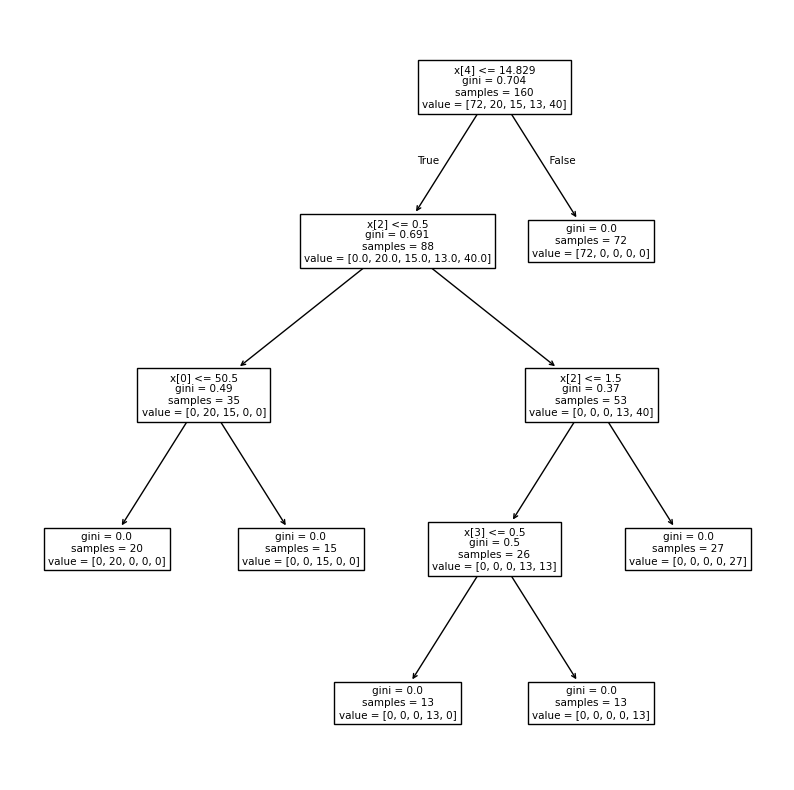

In [ ]:
from sklearn import tree
plt.figure(figsize = (10,10))
tree.plot_tree(clf_gini.fit(X_train,y_train))
plt.show()

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion = 'entropy' , random_state = 0)
clf_entropy.fit(X_train,y_train)
y_pred_entropy = clf_entropy.predict(X_test)

1.0


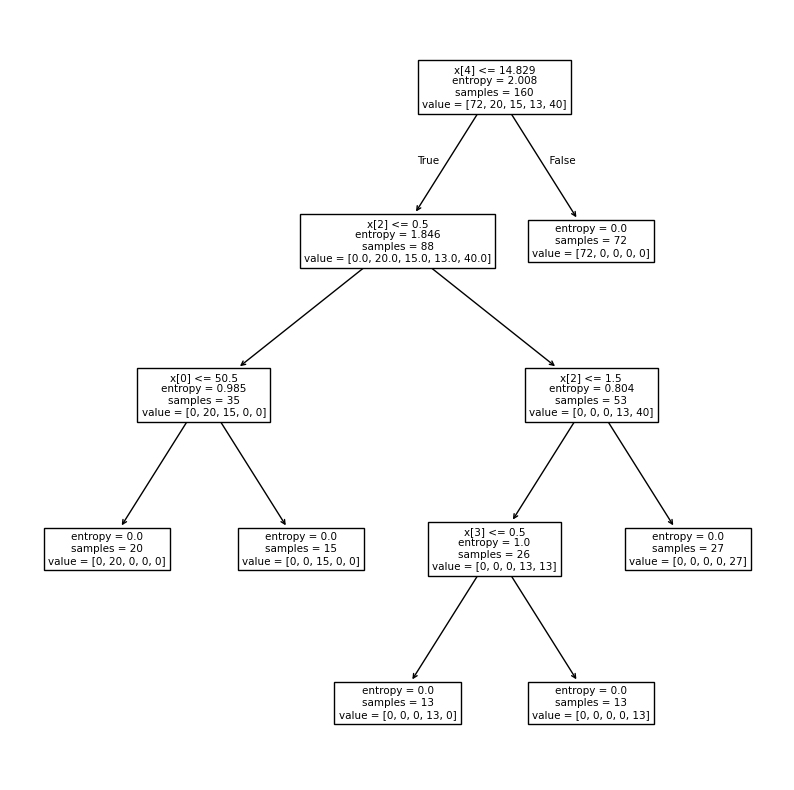

In [ ]:
print(accuracy_score(y_pred_entropy, y_test))
plt.figure(figsize = (10,10))
tree.plot_tree(clf_entropy.fit(X_train,y_train))
plt.show()